In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Complete_Reviews1.csv")
data.describe()

,Rating
count,729.000000
mean,4.480110
std,1.274195
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data.head()

,Author,Date,Rating,Review,City
0,Lorri R,25/05/16,5.0,We have never had a problem with our service. ...,Boston
1,Sabrina Fountain,09/06/16,5.0,I am the manager at All Star Heavy Haul & Towi...,Boston
2,jason cooper,09/06/16,5.0,our driver don is the best always here on thus...,Boston
3,Russ Smith,13/06/16,5.0,NaN,Boston
4,Candace Lawson,17/06/16,5.0,We have had Unifirst uniforms for some time no...,Boston


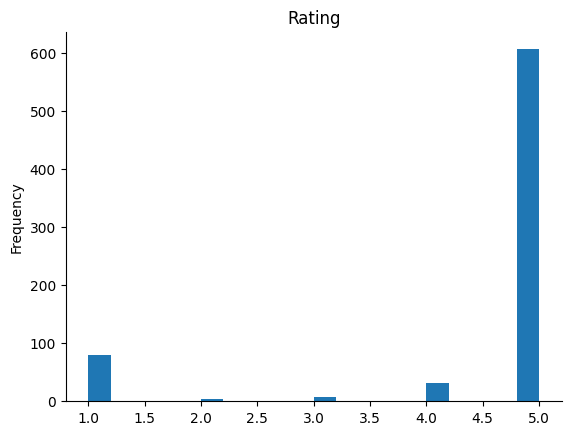

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
data['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
count=1
for i in data["Review"]:
  if count==21:
    break
  else:
    print(f'\nReview:\t{i}')
    count+=1


Review:	We have never had a problem with our service.  John Miller is our agent that brings us our mats.  Thank you

Review:	I am the manager at All Star Heavy Haul & Towing in Tracy, Ca.  My Unifirst-Stockton, Ca service rep Don is amazing, always polite and courteous and I will continue to use Unifirst.  They have great customer service in the office as well.  Highly recommend this company!!

Review:	our driver don is the best always here on thus-day happy he always give his best service.we consider him family.no complaints here.
jason cooper

Review:	nan

Review:	We have had Unifirst uniforms for some time now and each one of our experiences has been wonderful. Our current driver Keith is great and is always pleasant, on time and willing to help!

Review:	Gilbert from the San Diego branch has been a huge help!

Not only is he a good worker but he's also extremely friendly and reliable.

Uni-First has definitely been a step up compared to our previous coat vendor.

Review:	Jeremy C.

## Cleaning the dataset
* Dealing with NaN

In [ ]:
data.shape

(735, 5)

In [ ]:
data.dropna()
data.shape

(735, 5)

In [ ]:
data["Review"].dtypes

dtype('O')

In [ ]:
data.replace("NaN", pd.NA, inplace=True)

# Drop rows where any column has NaN values
data = data.dropna()
data.shape


(670, 5)

In [ ]:
print(f'Reviews where no comments were made :{735-670}')

Reviews where no comments were made :65


Again looking at data

In [ ]:
data.head()

,Author,Date,Rating,Review,City
0,Lorri R,25/05/16,5.0,We have never had a problem with our service. ...,Boston
1,Sabrina Fountain,09/06/16,5.0,I am the manager at All Star Heavy Haul & Towi...,Boston
2,jason cooper,09/06/16,5.0,our driver don is the best always here on thus...,Boston
4,Candace Lawson,17/06/16,5.0,We have had Unifirst uniforms for some time no...,Boston
5,Alberto Salgado,28/06/16,5.0,Gilbert from the San Diego branch has been a h...,Boston


# Sentiment Analysis of the Reviews
**We will use ["lxyuan/distilbert-base-multilingual-cased-sentiments-student"](https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student?text=Worst+company+ever.+I+work+for+a+university+and+they+never+fix+ripped%2C+torn+or+damaged+pants.+I+have+attached+several+notes+to+each+garment+and+they+still+come+back+unrepaired.+This+week+I+got+back+one+pair+of+uniform+pants+and+they+were+filthy+and+sticky.+I+hope+my+boss+gets+rid+of+this+company+once+and+for+all.+I+told+my+boss+I+will+be+wearing+my+Levi%E2%80%99s+I+don%E2%80%99t+want+to+get+an+infection.+Also+if+you+supply+the+lockers+for+uniforms+shouldn%E2%80%99t+you+be+maintaining+them+and+cleaning+them+when+they+get+dusty+and+dirty.+Any+response+would+be+nice.)**

In [ ]:
from transformers import pipeline

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
import math

# Define the maximum sequence length supported by the model
max_seq_length = 512  # or whatever the maximum sequence length is for your model

predicted_labels = []

# Iterate over inputs
for input_text in data["Review"]:
    # Split the input text into smaller segments if it exceeds the maximum sequence length
    input_segments = [input_text[i:i+max_seq_length] for i in range(0, len(input_text), max_seq_length)]

    # Iterate over each segment
    segment_predicted_labels = []
    for segment in input_segments:
        # Pass the input segment through the model
        output = distilled_student_sentiment_classifier(segment)

        # Extract the label with the highest score
        predicted_label = max(output[0], key=lambda x: x['score'])['label']
        segment_predicted_labels.append(predicted_label)

    # Combine the predicted labels for all segments
    combined_label = max(set(segment_predicted_labels), key=segment_predicted_labels.count)
    predicted_labels.append(combined_label)

# Print the list of predicted labels
print(predicted_labels)


['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'pos

In [ ]:
len(predicted_labels)

NameError: name 'predicted_labels' is not defined

In [ ]:
len(predicted_labels)==data.shape[0]

True

In [ ]:
counting=dict()
for i in predicted_labels:
  if i in counting:
    counting[i]+=1
  else:
    counting[i]=1
print(counting)

{'positive': 582, 'negative': 87, 'neutral': 1}


In [ ]:
df_sentiment={"Sentiment":["Positive","Negative","Neutral"],
              "Numbers":[582,87,2]}
df_sentiment=pd.DataFrame(df_sentiment)
df_sentiment

,Sentiment,Numbers
0,Positive,582
1,Negative,87
2,Neutral,2


In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_sentiment.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data["Sentiment"]=predicted_labels

In [ ]:
data.head()

,Author,Date,Rating,Review,City,Sentiment,label,unique_id
0,Lorri R,25/05/16,5.0,We have never had a problem with our service. ...,Boston,positive,Boston_positive,24
1,Sabrina Fountain,09/06/16,5.0,I am the manager at All Star Heavy Haul & Towi...,Boston,positive,Boston_positive,24
2,jason cooper,09/06/16,5.0,our driver don is the best always here on thus...,Boston,positive,Boston_positive,24
4,Candace Lawson,17/06/16,5.0,We have had Unifirst uniforms for some time no...,Boston,positive,Boston_positive,24
5,Alberto Salgado,28/06/16,5.0,Gilbert from the San Diego branch has been a h...,Boston,positive,Boston_positive,24


In [ ]:
data[data['Sentiment'] == 'negative']

,Author,Date,Rating,Review,City,Sentiment
33,Steve Vigeant,31/10/16,1.0,We have nothing but problems with this company...,Boston,negative
35,Michael William,27/09/19,1.0,The service has been quite poor. Please look ...,Boston,negative
37,andrew rush,29/02/20,1.0,My company is a new customer of them as we swi...,Boston,negative
40,G.R,20/07/22,1.0,"Unprofessional, always late and missing unifor...",Boston,negative
41,Munir K,28/12/23,1.0,Bunch of thieves… You’ll discover how they lit...,Boston,negative
...,...,...,...,...,...,...
718,Jeremy Cross,2021-01-19 00:34:43,5.0,I ordered some custom shirts from Lucas and th...,Indianpolis,negative
730,Dawn Wildt,2023-01-06 13:37:32,1.0,Worst customer service ever. Repeatedly get bi...,Indianpolis,negative
732,Dominique Lamont,2023-04-29 19:15:12,1.0,I was just wrongfully terminated! Banner on th...,Indianpolis,negative
733,Adria Anderson,2023-09-20 11:20:17,1.0,Unifirst has the worst customer service I have...,Indianpolis,negative


# Moving Towords Clustering
**Creating a column label that combining city and sentiment and then creating a column label_id giving unique numbers to each label**

In [ ]:
data["label"]=data['City']+'_'+data["Sentiment"]
data.head()

,Author,Date,Rating,Review,City,Sentiment,label,unique_id
0,Lorri R,25/05/16,5.0,We have never had a problem with our service. ...,Boston,positive,Boston_positive,0
1,Sabrina Fountain,09/06/16,5.0,I am the manager at All Star Heavy Haul & Towi...,Boston,positive,Boston_positive,0
2,jason cooper,09/06/16,5.0,our driver don is the best always here on thus...,Boston,positive,Boston_positive,0
4,Candace Lawson,17/06/16,5.0,We have had Unifirst uniforms for some time no...,Boston,positive,Boston_positive,0
5,Alberto Salgado,28/06/16,5.0,Gilbert from the San Diego branch has been a h...,Boston,positive,Boston_positive,0


In [ ]:
# Step 2: Create a Mapping between Label and Unique IDs
label_to_id = {}  # Dictionary to map label to ID
current_id = 0

for label in data['label'].unique():
    label_to_id[label] = current_id
    current_id += 1
data['unique_id'] = data['label'].map(label_to_id)


In [ ]:
data.tail()

,Author,Date,Rating,Review,City,Sentiment,label,unique_id
730,Dawn Wildt,2023-01-06 13:37:32,1.0,Worst customer service ever. Repeatedly get bi...,Indianpolis,negative,Indianpolis_negative,24
731,Justin Hood,2023-03-11 23:16:44,1.0,Terrible. I have till today to use my work all...,Indianpolis,negative,Indianpolis_negative,24
732,Dominique Lamont,2023-04-29 19:15:12,1.0,I was just wrongfully terminated! Banner on th...,Indianpolis,negative,Indianpolis_negative,24
733,Adria Anderson,2023-09-20 11:20:17,1.0,Unifirst has the worst customer service I have...,Indianpolis,negative,Indianpolis_negative,24
734,John Dushane,2024-01-08 09:23:51,1.0,Do your homework before using this company. Th...,Indianpolis,negative,Indianpolis_negative,24


checking how many unique_ids we have

In [ ]:
data['unique_id'].nunique()

25

**From here we'll find cluster for each unique_ids and from the cluster we'll extract the theme.**

In [ ]:
data["Sentiment"][731]="negative"
data["label"][731]="Indianpolis_negative"
data["unique_id"][731]=24

<ipython-input-41-60505b6d122c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentiment"][731]="negative"
<ipython-input-41-60505b6d122c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["label"][731]="Indianpolis_negative"
<ipython-input-41-60505b6d122c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["unique_id"][731]=24


In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Step 1: Vectorize the 'Review' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Review'])


In [ ]:
from collections import Counter

cluster_labels = {}

for unique_id, group_df in data.groupby('unique_id'):
    # Reset the index of group_df to ensure sequential indices
    group_df = group_df.reset_index(drop=True)

    # Check the number of samples in the group
    num_samples = len(group_df)

    if num_samples >= 3:  # Specify a minimum number of samples required for clustering
        # Apply K-means clustering to the TF-IDF vectors of reviews for each unique ID
        kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)  # Specify the number of clusters
        group_df['cluster'] = kmeans.fit_predict(X[group_df.index])
    else:
        # If there are not enough samples for clustering, assign a single cluster to all samples
        group_df['cluster'] = [0] * num_samples

    # Assign cluster names based on the labels mapped to those IDs
    cluster_labels[unique_id] = group_df['label'].iloc[0]  # Take the label of the first row in the group

# Print cluster labels
print(cluster_labels)


{0: 'Boston_positive', 1: 'Boston_negative', 2: 'Chicago_negative', 3: 'Chicago_positive', 4: 'New York_positive', 5: 'New York_negative', 6: 'Long Islands_positive', 7: 'Long Islands_negative', 8: 'Washington_positive', 9: 'Washington_negative', 10: 'Baltimore_negative', 11: 'Baltimore_positive', 12: 'Wilmington, NC_negative', 13: 'Wilmington, NC_positive', 14: 'Norfolk_positive', 15: 'Norfolk_negative', 16: 'Portland_positive', 17: 'Portland_negative', 18: 'Portland_neutral', 19: 'Atlanta_positive', 20: 'Atlanta_negative', 21: 'Tacoma_positive', 22: 'Tacoma_negative', 23: 'Indianpolis_positive', 24: 'Indianpolis_negative'}


In [ ]:
from collections import Counter

# Initialize a Counter object to store the total TF-IDF scores for each term across all clusters
total_tfidf_scores = Counter()

# Assuming you have already performed clustering and have the cluster labels in the 'cluster' column of your DataFrame

# For each cluster
for cluster_idx, group_df in data.groupby('cluster'):
    # Get the TF-IDF vectors of the documents in this cluster
    cluster_X = X[group_df.index]

    # Sum up the TF-IDF scores for each term across all documents in the cluster
    total_tfidf_scores.update({feature_names[idx]: score for idx, score in zip(cluster_X.indices, cluster_X.data)})

    # Get the top N terms with the highest total TF-IDF scores
    top_terms = total_tfidf_scores.most_common(10)  # Adjust 10 to get more or fewer terms

    # Print the top terms for this cluster
    print(f"Cluster {cluster_idx} Top Terms: {', '.join(term for term, _ in top_terms)}")


KeyError: 'cluster'

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


NameError: name 'nltk' is not defined

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

# Initialize a dictionary to store frequent words for each cluster
cluster_frequent_words = {}

# For each unique_id (cluster)
for unique_id in data['unique_id'].unique():
    # Filter DataFrame to include only rows belonging to this cluster
    cluster_df = data[data['unique_id'] == unique_id]

    # Extract text data (reviews) from the filtered DataFrame
    reviews_text = cluster_df['Review']

    # Concatenate reviews into a single string
    text_combined = ' '.join(reviews_text)

    # Preprocess the text data
    tokens = preprocess_text(text_combined)

    # Count the occurrences of each word
    word_counts = Counter(tokens)

    # Get the most frequent words
    frequent_words = word_counts.most_common(10)  # Adjust 10 to get more or fewer words

    # Store the frequent words for this cluster
    cluster_frequent_words[unique_id] = frequent_words

# Print frequent words for each cluster
for unique_id, frequent_words in cluster_frequent_words.items():
    label = data
    print(f"Cluster {label} frequent words: {frequent_words}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'id_label_mapping' is not defined

#Now we'll have the theme discussed in each city and with the sentiment.

In [ ]:
for unique_id, frequent_words in cluster_frequent_words.items():
    # Get the label corresponding to the unique_id from the data DataFrame
    label = data[data['unique_id'] == unique_id]['label'].iloc[0]

    # Print the label and frequent words
    print(f"Cluster {label} frequent words: {frequent_words}")


Cluster Boston_positive frequent words: [('always', 18), ('great', 18), ('service', 16), ('unifirst', 10), ('customer', 6), ('time', 6), ('driver', 5), ('good', 4), ('work', 4), ("n't", 4)]
Cluster Boston_negative frequent words: [('company', 4), ('uniforms', 3), ('weekly', 3), ('nothing', 2), ('delivery', 2), ('person', 2), ('manager', 2), ('till', 2), ('late', 2), ('service', 2)]
Cluster Chicago_negative frequent words: [('shirts', 12), ("n't", 11), ('us', 9), ('service', 7), ('call', 7), ('get', 6), ('contract', 6), ('manager', 6), ('charge', 6), ('time', 6)]
Cluster Chicago_positive frequent words: [('ramon', 14), ('always', 12), ('great', 8), ('service', 7), ('unifirst', 7), ('much', 6), ('work', 6), ('driver', 5), ('good', 5), ('services', 5)]
Cluster New York_positive frequent words: [('great', 4), ('service', 3), ('unifirst', 3), ('arnell', 2), ('always', 2), ('better', 2), ('happy', 2), ('business', 2), ("'m", 1), ('well', 1)]
Cluster New York_negative frequent words: [('week'

In [ ]:
data.to_csv("Cleaned_Preprocessed.csv")

Making a dictionary for positive and negative words with their frequency.

In [ ]:
positive_words_freq = {}
negative_words_freq = {}

# Iterate over cluster frequent words
for unique_id, frequent_words in cluster_frequent_words.items():
    # Get the label corresponding to the unique_id from the data DataFrame
    label = data[data['unique_id'] == unique_id]['label'].iloc[0]

    # Check if label has suffix "positive" or "negative"
    if label.endswith("positive"):
        # Add words and their frequencies to the positive_words_freq dictionary
        positive_words_freq[label] = frequent_words
    elif label.endswith("negative"):
        # Add words and their frequencies to the negative_words_freq dictionary
        negative_words_freq[label] = frequent_words

# Print the dictionaries
print("Positive Words and Frequencies:")
for label, frequent_words in positive_words_freq.items():
    print(f"Cluster {label} frequent words: {frequent_words}")

print("\nNegative Words and Frequencies:")
for label, frequent_words in negative_words_freq.items():
    print(f"Cluster {label} frequent words: {frequent_words}")


***Runtime disconnected!***

In [ ]:
Boston_positive = [('always', 18), ('great', 18), ('service', 16), ('unifirst', 10), ('customer', 6), ('time', 6), ('driver', 5), ('good', 4), ('work', 4), ("n't", 4)]
Boston_negative = [('company', 4), ('uniforms', 3), ('weekly', 3), ('nothing', 2), ('delivery', 2), ('person', 2), ('manager', 2), ('till', 2), ('late', 2), ('service', 2)]
Chicago_negative = [('shirts', 12), ("n't", 11), ('us', 9), ('service', 7), ('call', 7), ('get', 6), ('contract', 6), ('manager', 6), ('charge', 6), ('time', 6)]
Chicago_positive = [('ramon', 14), ('always', 12), ('great', 8), ('service', 7), ('unifirst', 7), ('much', 6), ('work', 6), ('driver', 5), ('good', 5), ('services', 5)]
New_York_positive = [('great', 4), ('service', 3), ('unifirst', 3), ('arnell', 2), ('always', 2), ('better', 2), ('happy', 2), ('business', 2), ("'m", 1), ('well', 1)]
New_York_negative = [('week', 8), ('items', 6), ('back', 6), ('’', 5), ('still', 4), ('uniforms', 4), ('previous', 4), ('deliver', 4), ('get', 4), ('company', 3)]
Long_Islands_positive = [('great', 2), ('really', 2), ('new', 2), ('unifirst', 2), ('working', 1), ('location', 1), ('since', 1), ('opened', 1), ('2015', 1), ('work', 1)]
Long_Islands_negative = [('beginning', 4), ('price', 3), ('service', 2), ('could', 2), ('services', 2), ('missing', 2), ('items', 2), ("n't", 2), ('great', 1), ('product', 1)]
Washington_positive = [('trent', 29), ('service', 27), ('always', 25), ('unifirst', 16), ('great', 14), ('company', 13), ('time', 9), ('’', 9), ('best', 8), ('uniform', 8)]
Washington_negative = [('company', 4), ('items', 4), ('even', 4), ('service', 4), ('us', 3), ('unifirst', 3), ('driver', 3), ('ordered', 3), ('also', 3), ('shirts', 3)]
Baltimore_negative = [('company', 9), ('issues', 9), ('service', 9), ('unifirst', 8), ('henry', 8), ('even', 6), ('never', 6), ('would', 6), ('garments', 6), ('ever', 5)]
Baltimore_positive= [('unifirst', 31), ('always', 24), ('henry', 24), ('service', 15), ('great', 13), ('work', 13), ('friendly', 12), ('driver', 11), ("'s", 10), ('best', 9)]
Wilmington_NC_negative = [('service', 7), ('customer', 5), ('time', 4), ('poor', 3), ('would', 3), ('management', 3), ('issue', 3), ('rude', 2), ('manager', 2), ('review', 2)]
Wilmington_NC_positive= [('company', 20), ('service', 18), ('great', 17), ('always', 16), ('unifirst', 15), ('sam', 15), ('recommend', 12), ('work', 11), ('us', 11), ('highly', 10)]
Norfolk_positive = [('gene', 51), ('always', 43), ('great', 39), ('service', 39), ('teo', 35), ('unifirst', 30), ('job', 28), ('company', 19), ('work', 18), ('us', 16)]
Norfolk_negative= [('company', 7), ('uniforms', 6), ('unifirst', 5), ("'ve", 4), ('get', 4), ("n't", 3), ('service', 3), ('never', 3), ("'s", 3), ('years', 2)]
Portland_positive = [('great', 26), ('lucas', 26), ('always', 22), ('service', 19), ('unifirst', 17), ('job', 13), ('bob', 9), ('best', 8), ('friendly', 8), ("'s", 8)]
Portland_negative = [('company', 9), ('service', 9), ('us', 5), ('never', 4), ("n't", 4), ('would', 4), ('wrong', 4), ('rags', 4), ('get', 4), ('items', 4)]
Portland_neutral = [('never', 2), ('get', 2), ('worst', 1), ('uniform', 1), ('company', 1), ('ever', 1), ('right', 1), ('uniforms', 1), ('time', 1)]
Atlanta_positive = [('class', 85), ('eb', 52), ('great', 44), ('david', 42), ('training', 42), ('instructor', 32), ('first', 31), ('cpr', 29), ('informative', 28), ('fun', 22)]
Atlanta_negative = [('https', 10), ('class', 6), ('david', 5), ('eb', 5), ('keep', 4), ('teaching', 4), ('skills', 3), ("'s", 3), ('attention', 3), ('great', 3)]
Tacoma_positive = [('always', 81), ('driver', 47), ('great', 37), ('service', 37), ('us', 31), ('unifirst', 30), ('brandon', 30), ('company', 27), ("'s", 27), ('robin', 27)]
Tacoma_negative = [('service', 5), ('contract', 5), ('us', 4), ('could', 4), ('get', 4), ('would', 3), ('unifirst', 3), ('aramark', 2), ('’', 2), ('never', 2)]
Indianpolis_positive = [('always', 55), ('great', 52), ('job', 39), ('service', 33), ('driver', 29), ('lucas', 27), ('unifirst', 26), ('us', 22), ('friendly', 20), ('anthony', 16)]
Indianpolis_negative = [('service', 7), ('always', 6), ('company', 6), ('uniforms', 6), ("n't", 4), ('customer', 4), ('prompt', 3), ('months', 3), ('size', 3), ('driver', 3)]


In [ ]:
positive_lists = [Boston_positive, Chicago_positive,New_York_positive,Long_Islands_positive,Washington_positive,Baltimore_positive,Wilmington_NC_positive,Norfolk_positive,Portland_positive,Atlanta_positive,Tacoma_positive,Indianpolis_positive ]
len(positive_lists)
negative_lists=[Long_Islands_negative,Boston_negative,Chicago_negative,New_York_negative,Washington_negative,Baltimore_negative,Wilmington_NC_negative,Norfolk_negative,Portland_negative,Atlanta_negative,Tacoma_negative,Indianpolis_negative]
positive_words_freq = [(word, freq) for sublist in positive_lists for word, freq in sublist]
negative_words_freq = [(word, freq) for sublist in negative_lists for word, freq in sublist]

# Create dictionaries from the merged lists
positive_dict = dict(positive_words_freq)
negative_dict = dict(negative_words_freq)

# Print the dictionaries
print("Positive Words Dictionary:", positive_dict)
print("Negative Words Dictionary:", negative_dict)


Positive Words Dictionary: {'always': 55, 'great': 52, 'service': 33, 'unifirst': 26, 'customer': 6, 'time': 9, 'driver': 29, 'good': 5, 'work': 18, "n't": 4, 'ramon': 14, 'much': 6, 'services': 5, 'arnell': 2, 'better': 2, 'happy': 2, 'business': 2, "'m": 1, 'well': 1, 'really': 2, 'new': 2, 'working': 1, 'location': 1, 'since': 1, 'opened': 1, '2015': 1, 'trent': 29, 'company': 27, '’': 9, 'best': 8, 'uniform': 8, 'henry': 24, 'friendly': 20, "'s": 27, 'sam': 15, 'recommend': 12, 'us': 22, 'highly': 10, 'gene': 51, 'teo': 35, 'job': 39, 'lucas': 27, 'bob': 9, 'class': 85, 'eb': 52, 'david': 42, 'training': 42, 'instructor': 32, 'first': 31, 'cpr': 29, 'informative': 28, 'fun': 22, 'brandon': 30, 'robin': 27, 'anthony': 16}
Negative Words Dictionary: {'beginning': 4, 'price': 3, 'service': 7, 'could': 4, 'services': 2, 'missing': 2, 'items': 4, "n't": 4, 'great': 3, 'product': 1, 'company': 6, 'uniforms': 6, 'weekly': 3, 'nothing': 2, 'delivery': 2, 'person': 2, 'manager': 2, 'till': 

In [ ]:
from collections import OrderedDict
# Sort the merged lists by frequency
sorted_positive_words_freq = sorted(positive_words_freq, key=lambda x: x[1], reverse=True)
sorted_negative_words_freq = sorted(negative_words_freq, key=lambda x: x[1], reverse=True)

# Create OrderedDicts from the sorted lists
positive_dict = OrderedDict(sorted_positive_words_freq)
negative_dict = OrderedDict(sorted_negative_words_freq)

# Print the dictionaries
print("Positive Words Dictionary:", positive_dict)
print("Negative Words Dictionary:", negative_dict)

Positive Words Dictionary: OrderedDict([('class', 85), ('always', 2), ('eb', 52), ('great', 2), ('gene', 51), ('driver', 5), ('david', 42), ('training', 42), ('service', 3), ('job', 13), ('teo', 35), ('instructor', 32), ('unifirst', 2), ('first', 31), ('us', 11), ('brandon', 30), ('trent', 29), ('cpr', 29), ('informative', 28), ('company', 13), ("'s", 8), ('robin', 27), ('lucas', 26), ('henry', 24), ('fun', 22), ('friendly', 8), ('work', 1), ('anthony', 16), ('sam', 15), ('ramon', 14), ('recommend', 12), ('highly', 10), ('time', 6), ('’', 9), ('best', 8), ('bob', 9), ('uniform', 8), ('customer', 6), ('much', 6), ('good', 4), ('services', 5), ("n't", 4), ('arnell', 2), ('better', 2), ('happy', 2), ('business', 2), ('really', 2), ('new', 2), ("'m", 1), ('well', 1), ('working', 1), ('location', 1), ('since', 1), ('opened', 1), ('2015', 1)])
Negative Words Dictionary: OrderedDict([('shirts', 3), ("n't", 2), ('https', 10), ('us', 3), ('company', 3), ('issues', 9), ('service', 2), ('week', 8